# EPA Carbon Monoxide AQI Analysis

## **Introduction**

In this notebook, I will take a deeper look at air quality data from the Environmental Protection Agency (EPA), building on my previous analysis of the Air Quality Index (AQI). You can explore my earlier work here:

 - [GitHub](https://github.com/Cyberoctane29/EPA-Air-Quality-AQI-Analysis): https://github.com/Cyberoctane29/EPA-Air-Quality-AQI-Analysis
 - [Kaggle](https://www.kaggle.com/code/saswatsethda/epa-air-quality-aqi-analysis): https://www.kaggle.com/code/saswatsethda/epa-air-quality-aqi-analysis
 
While my previous project focused on statistical analysis, exploratory data analysis (EDA), and data structures, this notebook expands on that foundation by incorporating statistical methods, probability analysis, outlier detection, sampling techniques, and hypothesis testing. The primary focus is on carbon monoxide levels and their impact on air pollution and public health.

As a member of an analytics team for the United States Environmental Protection Agency (EPA), I have been assigned to analyze air quality data with respect to carbon monoxide, a major air pollutant. The dataset includes information from more than 200 monitoring sites across various states, counties, and cities. By applying statistical techniques, I will explore patterns, detect outliers, and conduct hypothesis testing to generate meaningful insights. These findings will help inform environmental policy decisions, identify regions requiring intervention, and assess how air quality trends impact public health strategies.


## **Overview**  

To achieve this, I will:  

- **Perform descriptive statistics** to summarize air quality data across different regions.  
- **Determine probability distributions** that best fit the dataset and analyze the spread of AQI values.  
- **Detect outliers** using z-scores and other statistical techniques.  
- **Apply effective sampling methods** to optimize analysis on large datasets.  
- **Conduct hypothesis tests** to assess differences in AQI across locations, helping guide policy decisions.  
- **Visualize key trends** in air pollution data using graphs and charts to enhance interpretability.  

By carrying out these analyses, I aim to identify **which regions require intervention**, understand **how air quality trends impact public health**, and provide **data-driven insights to support environmental policies**.


## **Dataset Structure**  

### **Air Quality Datasets**  
These datasets contain air quality data collected by the Environmental Protection Agency (EPA), specifically focusing on **carbon monoxide** levels across multiple locations in the United States. The data comes from over 200 monitoring sites, each identified by state, county, city, and local site names. The datasets provide key information for analyzing air pollution trends and their potential public health impacts.

#### **Dataset 1-c4_epa_air_quality.csv: Air Quality Measurements**  
This dataset contains raw air quality data, including:  
- **date_local**: The date when the air quality measurement was recorded.  
- **state_name**: The U.S. state where the air quality was measured.  
- **county_name**: The county where the monitoring site is located.  
- **city_name**: The city (if applicable) where the air quality was recorded.  
- **local_site_name**: The name of the specific monitoring station.  
- **parameter_name**: The pollutant measured, which in this case is carbon monoxide.  
- **units_of_measure**: The unit used for measurement (Parts per million).  
- **arithmetic_mean**: The average concentration of carbon monoxide for the given date and location.  
- **aqi**: The Air Quality Index (AQI) value derived from the carbon monoxide concentration.  

#### **Dataset 2-c4_epa_air_quality.csv: Log-Transformed AQI Data**  
This dataset contains a **log-transformed** version of the AQI values, which helps in analyzing data distribution and handling skewness in air pollution measurements. It includes:  
- **date_local, state_name, county_name, city_name, local_site_name, parameter_name, units_of_measure** (same as Dataset 1).  
- **aqi_log**: The natural logarithm of the AQI value for improved statistical analysis.  

By using these datasets, this notebook will **analyze air pollution trends, detect outliers, apply hypothesis testing, and provide insights into environmental policies aimed at improving air quality.**  


## Importing Required Libraries
Before beginning the analysis, it is essential to import all necessary libraries. 

In [199]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm

# Exploring Air Quality Through Descriptive Statistics

### **Introduction**  

In this section, I utilize descriptive statistics to analyze and summarize air quality data from the United States Environmental Protection Agency (EPA), uncovering patterns and trends that support informed decision-making on environmental policies and public health initiatives. By employing Python libraries such as **pandas** and **numpy**, I compute key statistical measures—including **mean, median, standard deviation, and percentiles**—to understand the central tendencies and variability of AQI values. Through this exploration, I emphasize the crucial role of descriptive statistics in data interpretation and effective communication of findings.


I will load the dataset and display a sample of the data.


In [200]:
epa_data = pd.read_csv(r"C:\Users\saswa\Documents\GitHub\EPA-Carbon-Monoxide-AQI-Analysis\Data\c4_epa_air_quality.csv", index_col = 0)

To understand how the dataset is structured, I display the first 10 rows of the data.

In [201]:
epa_data.head(10)

,date_local,state_name,county_name,city_name,local_site_name,parameter_name,units_of_measure,arithmetic_mean,aqi
0,2018-01-01,Arizona,Maricopa,Buckeye,BUCKEYE,Carbon monoxide,Parts per million,0.473684,7
1,2018-01-01,Ohio,Belmont,Shadyside,Shadyside,Carbon monoxide,Parts per million,0.263158,5
2,2018-01-01,Wyoming,Teton,Not in a city,Yellowstone National Park - Old Faithful Snow ...,Carbon monoxide,Parts per million,0.111111,2
3,2018-01-01,Pennsylvania,Philadelphia,Philadelphia,North East Waste (NEW),Carbon monoxide,Parts per million,0.300000,3
4,2018-01-01,Iowa,Polk,Des Moines,CARPENTER,Carbon monoxide,Parts per million,0.215789,3
5,2018-01-01,Hawaii,Honolulu,Not in a city,Kapolei,Carbon monoxide,Parts per million,0.994737,14
6,2018-01-01,Hawaii,Honolulu,Not in a city,Kapolei,Carbon monoxide,Parts per million,0.200000,2
7,2018-01-01,Pennsylvania,Erie,Erie,NaN,Carbon monoxide,Parts per million,0.200000,2
8,2018-01-01,Hawaii,Honolulu,Honolulu,Honolulu,Carbon monoxide,Parts per million,0.400000,5
9,2018-01-01,Colorado,Larimer,Fort Collins,Fort Collins - CSU - S. Mason,Carbon monoxide,Parts per million,0.300000,6


### Understanding the AQI Column

The `aqi` column in the dataset represents the **Air Quality Index (AQI)**, which measures air pollution levels. It helps assess potential health impacts, with higher values indicating poorer air quality. The AQI is based on measurements of pollutants like particulate matter, ozone, carbon monoxide, sulfur dioxide, and nitrogen dioxide.

To gain more insights, I use the `info()` function:

In [202]:
epa_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 260 entries, 0 to 259
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date_local        260 non-null    object 
 1   state_name        260 non-null    object 
 2   county_name       260 non-null    object 
 3   city_name         260 non-null    object 
 4   local_site_name   257 non-null    object 
 5   parameter_name    260 non-null    object 
 6   units_of_measure  260 non-null    object 
 7   arithmetic_mean   260 non-null    float64
 8   aqi               260 non-null    int64  
dtypes: float64(1), int64(1), object(7)
memory usage: 20.3+ KB


This provides details on the dataset’s structure, including data types and missing values.

Next, I generate a table of descriptive statistics using the `describe()` function:

In [203]:
epa_data.describe()

,arithmetic_mean,aqi
count,260.000000,260.000000
mean,0.403169,6.757692
std,0.317902,7.061707
min,0.000000,0.000000
25%,0.200000,2.000000
50%,0.276315,5.000000
75%,0.516009,9.000000
max,1.921053,50.000000


#### Observations:

- The **count value** for the **aqi** column is **260**, indicating that there are **260 recorded AQI measurements** in the dataset. This suggests that the data represents **260 individual air quality observations**, likely corresponding to different time points or locations.  
- The **25th percentile** for the **aqi** column is **2**, meaning that **25% of the AQI values in the dataset are below this threshold**. This percentile provides insight into the **lower range of air quality**, indicating that a significant portion of the data falls within the lower AQI values, which may correspond to **better air quality**.  
- The **75th percentile** for the **aqi** column is **9**, meaning that **75% of the AQI values in the dataset fall below this value**. This indicates that **the majority of air quality measurements are concentrated within the lower range**, suggesting **relatively lower pollution levels** for a large portion of the data.  


### Analyzing AQI Across States
To analyze the distribution of AQI across states, I use:

In [204]:
epa_data['state_name'].describe()


count            260
unique            52
top       California
freq              66
Name: state_name, dtype: object

#### Key Insights:
- There are **260 entries** in the dataset for the state column, with **52 unique states**.
- **California appears most frequently (66 times)**, indicating that a significant portion of air quality data is collected from this state, possibly due to higher pollution levels or more monitoring stations.

### Statistical Analysis of AQI
To understand central tendencies and dispersion, I calculate key statistical metrics for the AQI column.

#### Mean AQI:


In [205]:
np.mean(epa_data["aqi"])


np.float64(6.757692307692308)

- The mean **AQI is approximately 6.76**, indicating that, on average, the air quality index in this dataset remains within the safe range.

#### Median AQI:

In [206]:
np.median(epa_data["aqi"])


np.float64(5.0)

- The median **AQI is 5**, which confirms that most air quality readings are relatively low.
- Since the mean is slightly higher than the median, the AQI values may be slightly *right-skewed*.

#### Minimum AQI (Best Recorded Air Quality):

In [207]:
np.min(epa_data["aqi"])

np.int64(0)

- The minimum **AQI value is 0**, representing the cleanest air observed in the dataset.


#### Maximum AQI (Worst Recorded Air Quality):

In [208]:
np.max(epa_data["aqi"])

np.int64(50)

- The maximum **AQI value is 50**, which is still well below the threshold of 100, indicating that even the worst recorded air quality remains within the safe range.

#### Standard Deviation of AQI:

Now, I will compute the **standard deviation** for the `aqi` column.

By default, the **numpy** library uses **0** as the **Delta Degrees of Freedom (ddof)**, while the **pandas** library uses **1**. To obtain the same standard deviation value using either library, I will specify the `ddof` parameter as **1** when performing the calculation.


In [209]:
np.std(epa_data["aqi"], ddof=1)


np.float64(7.061706678820724)

The s**tandard deviation is approximately 7.06**, indicating moderate variability in AQI values across the dataset.

### Key Takeaways  

- The **pandas** and **numpy** libraries provide powerful functions for computing descriptive statistics.  
- The **describe()** function in pandas provides a comprehensive summary of numerical or categorical columns.  
- Functions like **mean()**, **median()**, **min()**, **max()**, and **std()** in numpy allow for precise calculation of individual statistics.  

---

### Summary of Findings  

- The **arithmetic_mean** and **aqi** columns are **slightly right-skewed**.  
- The **range** of **arithmetic_mean** is **1.9**, while the **range** of **aqi** is **50**.  
- The **median values** are **0.276** (arithmetic_mean) and **5** (aqi).  
- The **standard deviations** are **0.3** for arithmetic_mean and **7.06** for aqi.  
- The **mean values** are **0.4** (arithmetic_mean) and **6.57** (aqi).  
- These insights suggest that **arithmetic_mean has less variability**, while **AQI shows moderate variability** in the dataset.  
---
### Presentation of Findings to Others  
To effectively present the findings to others, I would highlight key AQI statistics and relate them to air quality standards provided by AirNow.gov.  

- The **average AQI value** in this dataset is approximately **6.76**, which falls well within the **"safe" range**.  
- **75% of the AQI values** are below **9**, indicating that most of the data represents **satisfactory air quality**.  
- The **AQI values** in this dataset **do not exceed 50**, which is significantly below the threshold of **100**. This implies that **even for sensitive groups, the air quality is considered safe**.  
- For **carbon monoxide**, an **AQI of 50** corresponds to **4.7 parts per million (ppm)**, which is well below the **harmful level of 9.4 ppm** associated with an AQI of **100**.  
---

### Summary for Stakeholders  
To provide stakeholders with a clear summary, I would focus on key descriptive statistics and their implications:  

- **AQI Range and Distribution**: The AQI values range from **0 to 50**, with **75% of the values below 9**. This suggests that the air quality is predominantly within the **"good" range**, as defined by AirNow.gov.  
- **Central Tendency**: The **mean AQI is 6.76**, reflecting **satisfactory air quality**. Additionally, the **median AQI is 5**, showing that most values are clustered toward the lower end of the range.  
- **Variability**: The **standard deviation of AQI is 7.06**, indicating **moderate variability** in air quality measurements across the dataset.  
- **Interpretation for Stakeholders**: All AQI values in the dataset are **well below 100**, meaning the air quality is **safe even for sensitive groups**. For carbon monoxide, an **AQI of 50 corresponds to 4.7 ppm**, which is **significantly below the harmful level of 9.4 ppm** associated with an AQI of **100**.  

# Understanding and Analyzing Probability Distribution

### **Introduction**  

In this section, I explore probability distributions to assess air quality data from the United States Environmental Protection Agency (EPA). Understanding probability distributions is crucial for analyzing how data behaves, identifying patterns, and detecting anomalies. By applying the empirical rule and computing z-scores, I determine whether air quality follows a normal distribution and identify potential outliers. The dataset includes log-transformed AQI readings (aqi_log) to better approximate a normal distribution, aiding in statistical analysis.

 I load the dataset, which is a subset of the EPA’s air quality data, transformed for this analysis.


In [210]:
data = pd.read_csv(r"C:\Users\saswa\Documents\GitHub\EPA-Carbon-Monoxide-AQI-Analysis\Data\modified_c4_epa_air_quality.csv")

## **Exploring the Data**  

To understand the dataset structure, I display the first 10 rows:


In [211]:
data.head(10)


,date_local,state_name,county_name,city_name,local_site_name,parameter_name,units_of_measure,aqi_log
0,2018-01-01,Arizona,Maricopa,Buckeye,BUCKEYE,Carbon monoxide,Parts per million,2.079442
1,2018-01-01,Ohio,Belmont,Shadyside,Shadyside,Carbon monoxide,Parts per million,1.791759
2,2018-01-01,Wyoming,Teton,Not in a city,Yellowstone National Park - Old Faithful Snow ...,Carbon monoxide,Parts per million,1.098612
3,2018-01-01,Pennsylvania,Philadelphia,Philadelphia,North East Waste (NEW),Carbon monoxide,Parts per million,1.386294
4,2018-01-01,Iowa,Polk,Des Moines,CARPENTER,Carbon monoxide,Parts per million,1.386294
5,2018-01-01,Hawaii,Honolulu,Not in a city,Kapolei,Carbon monoxide,Parts per million,2.708050
6,2018-01-01,Hawaii,Honolulu,Not in a city,Kapolei,Carbon monoxide,Parts per million,1.098612
7,2018-01-01,Pennsylvania,Erie,Erie,NaN,Carbon monoxide,Parts per million,1.098612
8,2018-01-01,Hawaii,Honolulu,Honolulu,Honolulu,Carbon monoxide,Parts per million,1.791759
9,2018-01-01,Colorado,Larimer,Fort Collins,Fort Collins - CSU - S. Mason,Carbon monoxide,Parts per million,1.945910


The dataset includes a **log-transformed AQI column (`aqi_log`)**, which is useful for evaluating normality. I also check the number of rows and columns:  


In [212]:
data.shape


(260, 8)

### **Visualizing the Distribution of AQI Data**  

To analyze how `aqi_log` is distributed, I generate a histogram:  


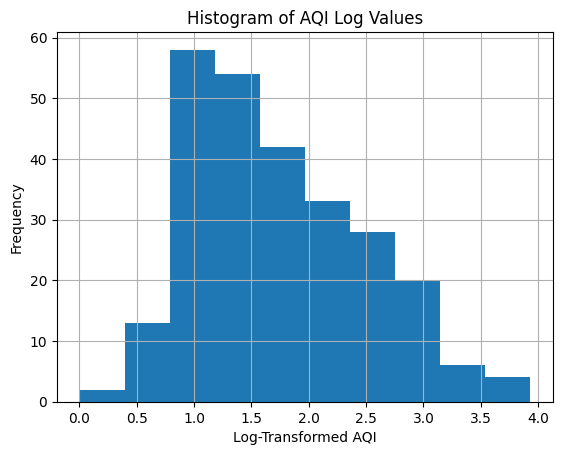

In [213]:
data['aqi_log'].hist()
plt.xlabel('Log-Transformed AQI')
plt.ylabel('Frequency')
plt.title('Histogram of AQI Log Values')
plt.show()

#### **Observation**  
The histogram shows that the **distribution is slightly right-skewed** but retains an approximately **bell-shaped curve**, indicating that the data is **approximately normal**.

## **Applying the Empirical Rule**  

The **empirical rule** states that for a normal distribution:  
- **68%** of data falls within **1 standard deviation** of the mean.  
- **95%** falls within **2 standard deviations** of the mean.  
- **99.7%** falls within **3 standard deviations** of the mean.  

First, I calculate the **mean and standard deviation** of `aqi_log`:  

In [214]:
aqi_mean = data['aqi_log'].mean()
aqi_std = data['aqi_log'].std()
print(f"Mean: {aqi_mean}, Standard Deviation: {aqi_std}")

Mean: 1.7669210929985582, Standard Deviation: 0.7147155520223721


### **Checking the Empirical Rule for 1 Standard Deviation**  

I define the lower and upper limits:  


In [215]:
lower_limit = aqi_mean - aqi_std
upper_limit = aqi_mean + aqi_std
print(f"Lower Limit: {lower_limit}, Upper Limit: {upper_limit}")

Lower Limit: 1.052205540976186, Upper Limit: 2.4816366450209304


Then, I calculate the **percentage of data within 1 standard deviation**:  


In [216]:
within_1_std = ((data['aqi_log'] >= lower_limit) & (data['aqi_log'] <= upper_limit)).mean() * 100
print(f"Percentage within 1 standard deviation: {within_1_std}%")

Percentage within 1 standard deviation: 76.15384615384615%


### **Checking the Empirical Rule for 2 Standard Deviations**  

I extend the range to **2 standard deviations**:  


In [217]:
lower_limit1 = aqi_mean - 2 * aqi_std
upper_limit1 = aqi_mean + 2 * aqi_std
print(f"Lower Limit: {lower_limit1}, Upper Limit: {upper_limit1}")

Lower Limit: 0.3374899889538139, Upper Limit: 3.1963521970433026


Then, I compute the **percentage of data within 2 standard deviations**:  


In [218]:
within_2_std = ((data['aqi_log'] >= lower_limit1) & (data['aqi_log'] <= upper_limit1)).mean() * 100
print(f"Percentage within 2 standard deviations: {within_2_std}%")

Percentage within 2 standard deviations: 95.76923076923077%


### **Checking the Empirical Rule for 3 Standard Deviations**  

I extend the range further to **3 standard deviations**:  

In [219]:
lower_limit2 = aqi_mean - 3 * aqi_std
upper_limit2 = aqi_mean + 3 * aqi_std
print(f"Lower Limit: {lower_limit2}, Upper Limit: {upper_limit2}")

Lower Limit: -0.37722556306855815, Upper Limit: 3.9110677490656744


Then, I calculate the **percentage of data within 3 standard deviations**:  


In [220]:
within_3_std = ((data['aqi_log'] >= lower_limit2) & (data['aqi_log'] <= upper_limit2)).mean() * 100
print(f"Percentage within 3 standard deviations: {within_3_std}%")

Percentage within 3 standard deviations: 99.61538461538461%



#### **Empirical Rule Results:**  
- **76.15%** of the data falls within **1 standard deviation** of the mean.  
- **95.77%** falls within **2 standard deviations** of the mean.  
- **99.62%** falls within **3 standard deviations** of the mean.  
  
While the **2 and 3 standard deviation percentages closely match the expected values (95% and 99.7%)**, the **1 standard deviation percentage (76.15%) is higher than the expected 68%**, suggesting **a slight deviation from normality**.  

## **Identifying Outliers Using Z-Scores**  


A **z-score** measures how many standard deviations a data point is from the mean. **Outliers typically have z-scores beyond ±3.**  

I calculate the **z-score for each AQI log value**:  

In [221]:
data["z_score"] = stats.zscore(data["aqi_log"], ddof=1)
data.head(10)

,date_local,state_name,county_name,city_name,local_site_name,parameter_name,units_of_measure,aqi_log,z_score
0,2018-01-01,Arizona,Maricopa,Buckeye,BUCKEYE,Carbon monoxide,Parts per million,2.079442,0.437265
1,2018-01-01,Ohio,Belmont,Shadyside,Shadyside,Carbon monoxide,Parts per million,1.791759,0.034753
2,2018-01-01,Wyoming,Teton,Not in a city,Yellowstone National Park - Old Faithful Snow ...,Carbon monoxide,Parts per million,1.098612,-0.935070
3,2018-01-01,Pennsylvania,Philadelphia,Philadelphia,North East Waste (NEW),Carbon monoxide,Parts per million,1.386294,-0.532557
4,2018-01-01,Iowa,Polk,Des Moines,CARPENTER,Carbon monoxide,Parts per million,1.386294,-0.532557
5,2018-01-01,Hawaii,Honolulu,Not in a city,Kapolei,Carbon monoxide,Parts per million,2.708050,1.316788
6,2018-01-01,Hawaii,Honolulu,Not in a city,Kapolei,Carbon monoxide,Parts per million,1.098612,-0.935070
7,2018-01-01,Pennsylvania,Erie,Erie,NaN,Carbon monoxide,Parts per million,1.098612,-0.935070
8,2018-01-01,Hawaii,Honolulu,Honolulu,Honolulu,Carbon monoxide,Parts per million,1.791759,0.034753
9,2018-01-01,Colorado,Larimer,Fort Collins,Fort Collins - CSU - S. Mason,Carbon monoxide,Parts per million,1.945910,0.250434


### **Detecting Outliers**  

I filter for values where the **z-score is greater than 3 or less than -3**:  

In [222]:
outliers = data[(data["z_score"] > 3) | (data["z_score"] < -3)]
outliers

,date_local,state_name,county_name,city_name,local_site_name,parameter_name,units_of_measure,aqi_log,z_score
244,2018-01-01,Arizona,Maricopa,Phoenix,WEST PHOENIX,Carbon monoxide,Parts per million,3.931826,3.029044


#### **Observation on Outliers:**  
- The **West Phoenix site** has an **aqi_log of 3.93** with a **z-score of 3.02**, which **exceeds the +3 threshold**.  
- This suggests **significantly higher air pollution** compared to other locations.  
- **West Phoenix is an outlier and may require additional investigation.**  

## **Key Takeaways**  

- **Visualizing the histogram** helps assess whether the data follows a normal distribution.  
- The **empirical rule** effectively confirms **approximate normality** in the dataset.  
- **Z-scores** allow for easy identification of **outliers**.  
- **West Phoenix stands out as an air quality outlier**, warranting further research.  

Tools like scipy and statsmodels are invaluable for data manipulation, visualization, and statistical analysis. They assist in standardizing data, such as using z-scores to scale observations relative to the mean, helping identify values that are 1, 2, or 3 standard deviations above or below the population mean.

---

## **Summary for Stakeholders**  

- The **log-transformed AQI data approximates a normal distribution**, making it more suitable for statistical analysis.  
- **West Phoenix is an outlier**, with an **aqi_log of 3.93 and a z-score of 3.02**, indicating **significantly higher air pollution levels** compared to other locations.  
- **76.15% of AQI values fall within one standard deviation**, which is **higher than the expected 68%**, suggesting a **slightly more concentrated distribution** around the mean.

# Analyzing Sampling Techniques and Their Impact on Data Insights

### **Introduction**

In this section, I will engage in effective sampling techniques to streamline the analysis of a large dataset. As a data professional, working with extensive datasets is common, and applying proper sampling methods enhances efficiency and accuracy in data-driven insights.  

Continuing from the previous scenario, I am part of an analytics team at the Environmental Protection Agency. My task is to analyze air quality data, specifically focusing on carbon monoxide—a significant air pollutant. To ensure a manageable and representative dataset, I will implement effective sampling techniques and report key findings based on the selected samples.

In [223]:
epa_data.head(10)

,date_local,state_name,county_name,city_name,local_site_name,parameter_name,units_of_measure,arithmetic_mean,aqi
0,2018-01-01,Arizona,Maricopa,Buckeye,BUCKEYE,Carbon monoxide,Parts per million,0.473684,7
1,2018-01-01,Ohio,Belmont,Shadyside,Shadyside,Carbon monoxide,Parts per million,0.263158,5
2,2018-01-01,Wyoming,Teton,Not in a city,Yellowstone National Park - Old Faithful Snow ...,Carbon monoxide,Parts per million,0.111111,2
3,2018-01-01,Pennsylvania,Philadelphia,Philadelphia,North East Waste (NEW),Carbon monoxide,Parts per million,0.300000,3
4,2018-01-01,Iowa,Polk,Des Moines,CARPENTER,Carbon monoxide,Parts per million,0.215789,3
5,2018-01-01,Hawaii,Honolulu,Not in a city,Kapolei,Carbon monoxide,Parts per million,0.994737,14
6,2018-01-01,Hawaii,Honolulu,Not in a city,Kapolei,Carbon monoxide,Parts per million,0.200000,2
7,2018-01-01,Pennsylvania,Erie,Erie,NaN,Carbon monoxide,Parts per million,0.200000,2
8,2018-01-01,Hawaii,Honolulu,Honolulu,Honolulu,Carbon monoxide,Parts per million,0.400000,5
9,2018-01-01,Colorado,Larimer,Fort Collins,Fort Collins - CSU - S. Mason,Carbon monoxide,Parts per million,0.300000,6


The dataset contains information on air quality measurements, including an `aqi` column representing the **Air Quality Index (AQI)**, which ranges from 0 to 500.


### **Descriptive Statistics**
To understand the dataset distribution, I generate descriptive statistics.


In [224]:
epa_data.describe(include='all')

,date_local,state_name,county_name,city_name,local_site_name,parameter_name,units_of_measure,arithmetic_mean,aqi
count,260,260,260,260,257,260,260,260.000000,260.000000
unique,1,52,149,190,253,1,1,NaN,NaN
top,2018-01-01,California,Los Angeles,Not in a city,Kapolei,Carbon monoxide,Parts per million,NaN,NaN
freq,260,66,14,21,2,260,260,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.403169,6.757692
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.317902,7.061707
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.200000,2.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.276315,5.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.516009,9.000000


In [225]:
epa_data['aqi'].median()

np.float64(5.0)

In [226]:
population_mean = epa_data['aqi'].mean()
population_mean

np.float64(6.757692307692308)

- **Median AQI:** 5.0 
- **Mean AQI:** 6.757692  
- **Total AQI Measurements:** 260  
  
The mean AQI value will later be compared with the sample mean to evaluate sampling accuracy.



## **Statistical Sampling**
### **Sampling with Replacement**
I extract a random sample of 50 AQI values from the dataset using **sampling with replacement**.

In [227]:
sampled_data = epa_data.sample(n=50, replace=True, random_state=42)
sampled_data.head(10)

,date_local,state_name,county_name,city_name,local_site_name,parameter_name,units_of_measure,arithmetic_mean,aqi
102,2018-01-01,Texas,Harris,Houston,Clinton,Carbon monoxide,Parts per million,0.157895,2
106,2018-01-01,California,Imperial,Calexico,Calexico-Ethel Street,Carbon monoxide,Parts per million,1.183333,26
71,2018-01-01,Alabama,Jefferson,Birmingham,Arkadelphia/Near Road,Carbon monoxide,Parts per million,0.200000,2
188,2018-01-01,Arizona,Maricopa,Tempe,Diablo,Carbon monoxide,Parts per million,0.542105,10
20,2018-01-01,Virginia,Roanoke,Vinton,East Vinton Elementary School,Carbon monoxide,Parts per million,0.100000,1
102,2018-01-01,Texas,Harris,Houston,Clinton,Carbon monoxide,Parts per million,0.157895,2
121,2018-01-01,North Carolina,Mecklenburg,Charlotte,Garinger High School,Carbon monoxide,Parts per million,0.200000,2
214,2018-01-01,Florida,Broward,Davie,Daniela Banu NCORE,Carbon monoxide,Parts per million,0.273684,5
87,2018-01-01,California,Humboldt,Eureka,Jacobs,Carbon monoxide,Parts per million,0.393750,5
99,2018-01-01,California,Santa Barbara,Goleta,Goleta,Carbon monoxide,Parts per million,0.222222,3


### **Key Insights**
- **Repeated Row Indices:** Some rows appear more than once due to sampling with replacement.
- **Random Seed (`random_state`)** ensures reproducibility in sampling.

### **Comparing Sample and Population Means**
I calculate the **population mean** and **sample mean** to analyze sampling variability.

In [228]:
sample_mean = sampled_data['aqi'].mean()

population_mean, sample_mean

(np.float64(6.757692307692308), np.float64(5.54))

- The **sample mean differs from the population mean** due to sampling variability.


## **Central Limit Theorem (CLT) in Action**
The **Central Limit Theorem (CLT)** states that as the number of random samples increases, the sampling distribution of the sample mean approaches a normal distribution.

Imagine repeating the the earlier sample with replacement 10,000 times and obtaining 10,000 point estimates of the mean. In other words, imagine taking 10,000 random samples of 50 AQI values and computing the mean for each sample. 

### **Simulating the Sampling Distribution**
I take **10,000 random samples** (with replacement) and compute the mean for each.

In [229]:
estimate_list = [epa_data['aqi'].sample(n=50, replace=True).mean() for _ in range(10000)]

# Convert to DataFrame
estimate_df = pd.DataFrame({'estimate': estimate_list})

# Compute the mean of sample means
mean_sample_means = estimate_df['estimate'].mean()

mean_sample_means

np.float64(6.765575999999999)


- **Mean of Sample Means:** 6.748  
- The mean of sample means closely matches the population mean, confirming the CLT.

Random sampling with replacement supports the central limit theorem by ensuring independent observations from the population. According to the theorem, if the sample size is sufficiently large and observations are independent, the sampling distribution of the sample mean approaches a normal distribution. This distribution's mean equals the population mean, and its standard deviation is the standard error. Sampling with replacement maintains independence, allowing the theorem to hold and reducing selection bias.

## **Visualization and Standard Error Calculation**
### **Histogram of Sampling Distribution**
I visualize the **sampling distribution** using a histogram.

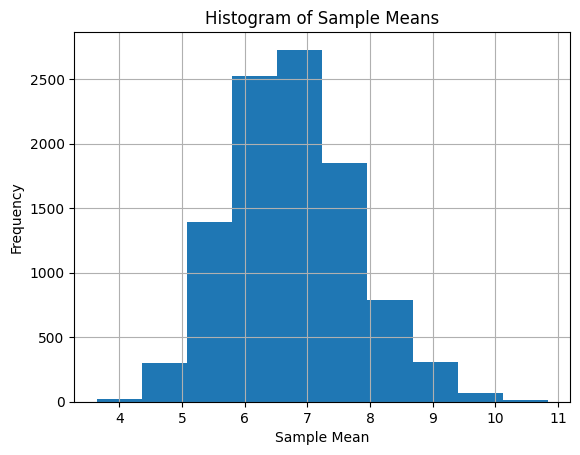

In [230]:
estimate_df['estimate'].hist()
plt.xlabel('Sample Mean')
plt.ylabel('Frequency')
plt.title('Histogram of Sample Means')
plt.show()


### **Standard Error Calculation**

Calculating the **standard error** of the mean AQI using the initial sample of 50.

In [231]:
standard_error = sampled_data['aqi'].std() / np.sqrt(len(sampled_data))
standard_error

np.float64(0.7413225908290325)

The **standard error** of a statistic measures the sample-to-sample variability of the sample statistic. It provides a numerical measure of sampling variability and answers the question: How far is a statistic based on one particular sample from the actual value of the statistic?

## **Relationship Between Sampling and Normal Distributions**
To compare the **sampling distribution** with a **normal distribution**, I plot:

- A histogram of **10,000 sample means**  
- Vertical lines for:
  - **Population mean** (solid green)
  - **Sample mean from the first sample** (dashed red)
  - **Mean of sample means** (dotted blue)
  - **Theoretical normal distribution curve**

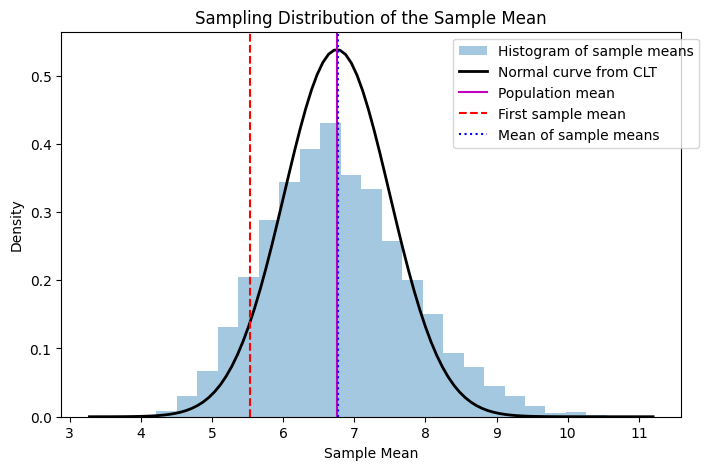

In [232]:
plt.figure(figsize=(8,5))
plt.hist(estimate_df['estimate'], bins=25, density=True, alpha=0.4, label="Histogram of sample means")
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, population_mean, standard_error)
plt.plot(x, p, 'k', linewidth=2, label="Normal curve from CLT")
plt.axvline(x=population_mean, color='m', linestyle='solid', label="Population mean")
plt.axvline(x=sample_mean, color='r', linestyle='--', label="First sample mean")
plt.axvline(x=mean_sample_means, color='b', linestyle=':', label="Mean of sample means")
plt.title("Sampling Distribution of the Sample Mean")
plt.xlabel("Sample Mean")
plt.ylabel("Density")
plt.legend(bbox_to_anchor=(1.04,1))
plt.show()

### **Observations**
From the sampling distribution, I observed the following insights:

- As the number of sampling means increased, the distribution of sample means approached a normal distribution, which aligns with the central limit theorem.
- The sample mean from the first random sample (red dashed line) is off-center, demonstrating sampling variability. This mean would differ if random_state had a different value, highlighting the impact of random sampling.
- The population mean (green solid line) and the mean of the sample means from 10,000 random samples (blue dotted line) essentially coincide, confirming the central limit theorem, which states that the sampling distribution of the mean will converge to the population mean as sample size increases.

### **Key Takeaways**  

- **Python’s `random.sample()` function** enables random sampling, helping draw inferences about the population from a sample.  
- **The Central Limit Theorem (CLT) ensures that the distribution of sample means approximates a normal distribution** when the sample size is sufficiently large.  
- **The sample mean converges to the true population mean** as more samples are taken, but individual sample means may vary due to sampling variability.  
- **The first sample mean differed from the population mean**, highlighting how random selection can lead to deviations.  

---

### **Findings and Insights**  

- The **mean AQI of the sample was lower than the population mean**, suggesting a meaningful deviation rather than random variation.  
- If the **difference between the sample mean and population mean exceeds 2–3 standard errors**, it is considered statistically significant.  
- Factors such as **pollution sources, geography, and environmental policies** may explain differences in AQI between regions, rather than just random sampling variation.  
- The **first sample mean was notably below 100**, indicating that the sampled regions may generally have good air quality.  
- Since the **difference between the sample mean and population mean was statistically significant**, it suggests that the sample represents a distinct subset rather than just a random fluctuation.  

---

### **Communicating to Stakeholders**  

- **Carbon monoxide (CO) levels are generally within acceptable limits**, based on the sample.  
- However, **some regions may still experience unhealthy CO levels**, requiring targeted interventions.  
- **Funding should be allocated for further investigation** to identify areas with suboptimal air quality and implement appropriate mitigation strategies.  
- **Further research can help pinpoint contributing factors**, such as industrial emissions, traffic density, or geographic influences.  

This analysis underscores the importance of **statistical inference in environmental policy decisions**, helping guide resource allocation and regulatory actions.

# Exploring Confidence Intervals: Understanding Variability and Estimation

### **Introduction**

In this section, my task is to analyze which of these states are most likely to be impacted if the proposed federal policy is enacted. Building on the previous scenario, I am collaborating with the Strategy division of Ripple Renewable Energy (RRE) to analyze which states are most likely to be impacted if the proposed federal policy is enacted. RRE operates as part of the United States Environmental Protection Agency (EPA). I have recently started a new role as a data analyst in the Strategy division of RRE. **RRE operates in the following U.S. states: `California`, `Florida`, `Michigan`, `Ohio`, `Pennsylvania`, and `Texas`.**

The Air Quality Index (AQI) is the Environmental Protection Agency's index for reporting air quality. A value close to 0 signals little to no public health concern, while higher values are associated with increased risk to public health. The United States is considering a new federal policy that would create a subsidy for renewable energy in states observing an average AQI of 10 or above.

My manager has requested that I conduct the following analysis:  

1. Summarize the mean AQI for the states where RRE operates.  
2. Create a boxplot visualization of AQI for these states using `seaborn`.  
3. Evaluate which state(s) are most likely to be affected by the proposed policy based on the data and my boxplot visualization.  
4. Construct a confidence interval for the RRE state with the highest mean AQI.

## **Data Exploration**  
### **Understanding the Dataset**  

In [233]:
epa_data.head(10)


,date_local,state_name,county_name,city_name,local_site_name,parameter_name,units_of_measure,arithmetic_mean,aqi
0,2018-01-01,Arizona,Maricopa,Buckeye,BUCKEYE,Carbon monoxide,Parts per million,0.473684,7
1,2018-01-01,Ohio,Belmont,Shadyside,Shadyside,Carbon monoxide,Parts per million,0.263158,5
2,2018-01-01,Wyoming,Teton,Not in a city,Yellowstone National Park - Old Faithful Snow ...,Carbon monoxide,Parts per million,0.111111,2
3,2018-01-01,Pennsylvania,Philadelphia,Philadelphia,North East Waste (NEW),Carbon monoxide,Parts per million,0.300000,3
4,2018-01-01,Iowa,Polk,Des Moines,CARPENTER,Carbon monoxide,Parts per million,0.215789,3
5,2018-01-01,Hawaii,Honolulu,Not in a city,Kapolei,Carbon monoxide,Parts per million,0.994737,14
6,2018-01-01,Hawaii,Honolulu,Not in a city,Kapolei,Carbon monoxide,Parts per million,0.200000,2
7,2018-01-01,Pennsylvania,Erie,Erie,NaN,Carbon monoxide,Parts per million,0.200000,2
8,2018-01-01,Hawaii,Honolulu,Honolulu,Honolulu,Carbon monoxide,Parts per million,0.400000,5
9,2018-01-01,Colorado,Larimer,Fort Collins,Fort Collins - CSU - S. Mason,Carbon monoxide,Parts per million,0.300000,6


In [234]:
epa_data['date_local'] = pd.to_datetime(epa_data['date_local'])


In [235]:
epa_data.describe(include='all')

,date_local,state_name,county_name,city_name,local_site_name,parameter_name,units_of_measure,arithmetic_mean,aqi
count,260,260,260,260,257,260,260,260.000000,260.000000
unique,NaN,52,149,190,253,1,1,NaN,NaN
top,NaN,California,Los Angeles,Not in a city,Kapolei,Carbon monoxide,Parts per million,NaN,NaN
freq,NaN,66,14,21,2,260,260,NaN,NaN
mean,2018-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.403169,6.757692
min,2018-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000
25%,2018-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.200000,2.000000
50%,2018-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.276315,5.000000
75%,2018-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.516009,9.000000
max,2018-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,1.921053,50.000000


### **Key Insights**  
- **Time Range**: The data covers a single day, **January 1st, 2018**.  
- **AQI Range**: The minimum AQI value is **0**, while the maximum is **50**.  
- **State Representation**: The number of AQI reporting sites varies by state. For example, California has **66** sites, whereas states like Delaware and Alabama have only **one** site each.  

## **Statistical Analysis**  
### **Summarizing Mean AQI for RRE States**  
Filtering the dataset for RRE states and calculating mean AQI:  

In [236]:
rre_states = ['California', 'Florida', 'Michigan', 'Ohio', 'Pennsylvania', 'Texas']

epa_rre = epa_data[epa_data['state_name'].isin(rre_states)]

epa_rre.groupby(['state_name']).agg({'aqi': 'mean', 'state_name': 'count'})

,aqi,state_name
state_name,,
California,12.121212,66
Florida,5.500000,12
Michigan,8.111111,9
Ohio,3.333333,12
Pennsylvania,2.900000,10
Texas,2.700000,10


### **Key Findings**  
- California has the highest mean AQI.  
- Michigan also shows AQI values near the threshold but remains below 10 on average.  

### **Visualizing AQI Distribution Using a Boxplot**  

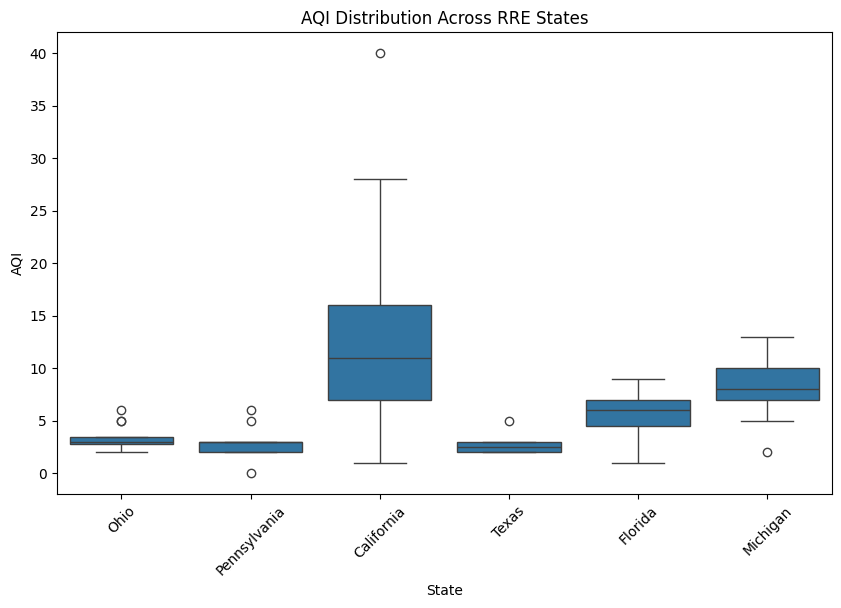

In [237]:
plt.figure(figsize=(10,6))
sns.boxplot(x=epa_rre['state_name'], y=epa_rre['aqi'])
plt.xlabel('State')
plt.ylabel('AQI')
plt.title('AQI Distribution Across RRE States')
plt.xticks(rotation=45)
plt.show()

### **Interpretation**  
- **California**: The mean AQI and a significant portion of the boxplot range are above 10, suggesting that California will likely be most affected by the policy.
- **Michigan**: Although the mean AQI is below 10, the boxplot shows that a portion of the data still ranges above 10, indicating that Michigan could also be impacted by the policy.

## **Constructing a Confidence Interval for California**  
Since **California** has the highest mean AQI, I will calculate a **95% confidence interval** for its AQI.  

4-step process in constructing a confidence interval:

1.   Identify a sample statistic.
2.   Choose a confidence level.
3.   Find the margin of error. 
4.   Calculate the interval.

### **Calculating Sample Mean**  

In [238]:
epa_ca = epa_data[epa_data['state_name'] == 'California']
sample_mean = epa_ca['aqi'].mean()
sample_mean

np.float64(12.121212121212121)

### **Defining Confidence Level**  


I need to choose a confidence level for my analysis. The most common choice is 95%, but I can opt for 90% if I want a lower confidence level or 99% if I want to increase my confidence in the results.

In [239]:
confidence_level = 0.95

### **Computing Margin of Error**  

The margin of error is calculated using:  
**Margin of Error = z * Standard Error**  

To compute the margin of error, follow these steps:  

1. Determine the z-value based on the chosen confidence level.  
2. Find the corresponding z-score for common confidence levels.  
3. Calculate the Standard Error estimate using:

$$ SE = \frac{\sigma}{\sqrt{n}} $$


#### **Z-Scores for Common Confidence Levels**  

| Confidence Level | Z Score |
| --- | --- |
| 90% | 1.65 |
| 95% | 1.96 |
| 99% | 2.58 |


In [240]:
z_value = 1.96

standard_error=epa_ca['aqi'].std()/np.sqrt(epa_ca.shape[0])
print("standard error:")
print(standard_error)

margin_of_error=z_value*standard_error
print("margin of error:")
print(margin_of_error)

standard error:
0.8987209641127412
margin of error:
1.7614930896609726


### **Computing Confidence Interval** 

I will calculate both the lower and upper limits around the sample mean to construct the confidence interval.

$$
\text{Confidence Interval} = \left[ \text{Sample Mean} - \text{Margin of Error}, \text{Sample Mean} + \text{Margin of Error} \right]
$$


In [241]:
lower_CI_limit = sample_mean - margin_of_error
upper_CI_limit = sample_mean + margin_of_error
confidence_interval = (lower_CI_limit, upper_CI_limit)
confidence_interval

(np.float64(10.359719031551148), np.float64(13.882705210873095))

Alternatively, using `scipy.stats`:  


`scipy` presents a simpler solution to developing a confidence interval. 

I will input my chosen `confidence_level`, `sample_mean`, and `standard_error` into `stats.norm.interval()` to compute the confidence interval.

In [242]:
stats.norm.interval(confidence=confidence_level, loc=sample_mean, scale=standard_error)


(np.float64(10.359751399400034), np.float64(13.882672843024208))

### **Confidence Interval Results**  
- **95% Confidence Interval for California’s Mean AQI**: **[10.36, 13.88]**  
- Since the **lower bound (10.36) exceeds the threshold of 10**, California is **highly likely** to be affected by the proposed policy. 

### **Key Takeaways**  

- **California and Michigan had the highest mean AQI values**, with California being the most likely state to exceed the threshold of **10**.  
- **California is expected to be the most affected** by the proposed policy due to its **high sample mean AQI**.  
- **Confidence intervals help estimate the population mean AQI** with a specified level of certainty.  
- I computed the confidence interval using **`scipy.stats.norm.interval()`**, which requires:  
  - **`alpha`**: Confidence level  
  - **`loc`**: Sample mean  
  - **`scale`**: Standard error  
- This analysis involved working with key Python libraries such as **scipy, pandas, and numpy**.  

The boxplot visualization confirmed that **California and Michigan had the highest mean AQI values**. Based on the confidence interval, **California is the most likely state to be impacted by the policy change**. The **95% confidence interval** for California's AQI was constructed to quantify this impact.  

---

### **Presentation of Findings**  

To effectively communicate these findings, I would:  

- **Walk through the analytical process** using the notebook to explain the methodology behind constructing confidence intervals.  
- **Interpret the 95% confidence interval**:  
  - The computed confidence interval was **[10.36, 13.88]**.  
  - Since the **lower bound (10.36) exceeds the threshold of 10**, this strongly suggests that **California's population mean AQI is above the threshold**.  
- **Demonstrate how confidence levels affect the interval**:  
  - If the confidence level were increased to **99%**, the interval would widen to **[9.80, 14.43]**, providing greater certainty at the cost of precision.  

It is important to clarify that confidence intervals do **not** indicate a **95% probability** that the population mean falls within the interval. Instead, if the sampling process were repeated many times, **95% of those confidence intervals would contain the true mean AQI**.

---

### **Summary for Stakeholders**  

To external stakeholders, I would highlight the following:  

- **California's AQI surpasses the threshold of 10**:  
  - The **mean AQI for California is significantly above the threshold**, suggesting potential regulatory concerns.  
- **Statistical significance**:  
  - Confidence intervals provide **statistical evidence** that California is likely to be affected by the policy.  
- **95% Confidence Interval for California**:  
  - The **95% confidence interval** for the **population mean AQI** in California is **[10.36, 13.88]**.  
  - Because the **entire interval lies above 10**, **California is highly likely to require policy intervention**.  
- **Potential limitations**:  
  - This analysis is based on a **single day's data**, which may not fully reflect long-term trends.  
  - The dataset has an **unequal representation of states**, with California having **more reporting sites than others**, which could introduce bias.  

These findings suggest that **California is the most affected state under the proposed policy** and **should be a priority for regulatory action**.



# Exploring Hypothesis Testing: Statistical Methods for Data-Driven Insights

### **Introduction**

In this section, I am collaborating with *Repair Our Air* (ROA), an environmental think tank group within the United States Environmental Protection Agency (EPA). ROA is developing policy recommendations to improve air quality in the United States and is leveraging the EPA’s Air Quality Index (AQI) data to guide its decision-making.  

An AQI value close to 0 indicates "little to no" public health concern, while higher values are linked to increased health risks. To support ROA’s strategic priorities, I am conducting statistical analyses on AQI data to provide insights that will help them target the most pressing air quality challenges.

ROA is considering several strategic decisions and has tasked me with conducting hypothesis tests and visualizations to support their decision-making. Using a 5% significance level, I will apply statistical analysis to provide data-driven recommendations. For two-sample t-tests, I will use Welch’s t-test (`equal_var=False` in `scipy.stats.ttest_ind()`) to account for the possibly unequal variances between the two groups in the comparison.

The key analyses include:  

1. **Metropolitan vs. Statewide AQI in California**  
   - ROA is considering a metropolitan-focused approach and wants to determine whether the mean AQI in Los Angeles County is statistically different from the rest of California. I will conduct a hypothesis test and create a visualization to compare these two groups.  

2. **Comparing AQI in New York and Ohio**  
   - With limited resources, ROA must decide between New York and Ohio for its next regional office. To inform this decision, I will test whether New York has a lower AQI than Ohio and visualize the results.  

3. **Assessing Michigan’s AQI Against Policy Threshold**  
   - A new policy will impact states with a mean AQI of 10 or greater. To determine whether Michigan will be affected, I will perform a hypothesis test comparing Michigan’s mean AQI to this threshold and present the findings visually.  

These analyses will help ROA prioritize its strategy for improving air quality across the United States.

## **Exploring the Data**  

Before proceeding with the hypothesis tests, I explored the dataset to understand its structure and verify if it provides sufficient information for analysis.  

In [243]:
print(epa_data.head(10))
print(epa_data.describe(include='all'))
print(epa_data['state_name'].value_counts())

  date_local    state_name   county_name      city_name  \
0 2018-01-01       Arizona      Maricopa        Buckeye   
1 2018-01-01          Ohio       Belmont      Shadyside   
2 2018-01-01       Wyoming         Teton  Not in a city   
3 2018-01-01  Pennsylvania  Philadelphia   Philadelphia   
4 2018-01-01          Iowa          Polk     Des Moines   
5 2018-01-01        Hawaii      Honolulu  Not in a city   
6 2018-01-01        Hawaii      Honolulu  Not in a city   
7 2018-01-01  Pennsylvania          Erie           Erie   
8 2018-01-01        Hawaii      Honolulu       Honolulu   
9 2018-01-01      Colorado       Larimer   Fort Collins   

                                     local_site_name   parameter_name  \
0                                            BUCKEYE  Carbon monoxide   
1                                          Shadyside  Carbon monoxide   
2  Yellowstone National Park - Old Faithful Snow ...  Carbon monoxide   
3                             North East Waste (NEW)  Carb

### **Observations:**  

Based on the preceding data exploration, the three research questions can be answered with the available data. Specifically:

- For the first hypothesis, I have county-level AQI data, which is sufficient to compare the AQI between Los Angeles County and the rest of California.  
- For the second hypothesis, both Ohio and New York have a sufficient number of observations in the dataset, allowing for a robust comparison of their AQI levels.  
- The third hypothesis about Michigan’s AQI and its potential impact from the new policy can also be assessed, as Michigan's data is available and contains enough information for the analysis.  

Overall, the dataset is well-suited to answer these research questions, given the availability of county-level and state-level data for each hypothesis.

## **Hypothesis Testing**  

For each question, I followed these steps:  
1. **Formulated the null and alternative hypotheses**  
2. **Set the significance level** at 5%  
3. **Determined the appropriate statistical test**  
4. **Computed the p-value**  
5. **Drew conclusions based on the results**  

### **Hypothesis 1: Los Angeles County vs. Rest of California**  

ROA is considering a metropolitan-focused approach. Within California, they want to know if the mean AQI in Los Angeles County is statistically different from the rest of California.


#### **Hypothesis Formulation:**  
- **Null Hypothesis (H₀):** The mean AQI in **Los Angeles County** is **equal to** the rest of California.  
- **Alternative Hypothesis (Hₐ):** The mean AQI in **Los Angeles County** is **different from** the rest of California.  

#### **Data Preparation:**  


In [244]:
ca_la = epa_data[epa_data['county_name'] == 'Los Angeles']
ca_other = epa_data[(epa_data['state_name'] == 'California') & (epa_data['county_name'] != 'Los Angeles')]

print(ca_la['aqi'].mean())
print(ca_other['aqi'].mean())

16.285714285714285
11.0


#### **T-Test and P-Value Calculation:**  

Here, I am comparing the sample means between two independent samples in one direction. Therefore, I will utilize a two-sample t-test.

In [245]:
stats.ttest_ind(a=ca_la['aqi'], b=ca_other['aqi'], equal_var=False)


TtestResult(statistic=np.float64(2.1107010796372014), pvalue=np.float64(0.049839056842410995), df=np.float64(17.08246830361151))

#### **Result Interpretation:**  
The **p-value is 0.049**, which is **less than** the 5% significance level. This allows me to **reject the null hypothesis** in favor of the alternative hypothesis.  

**Conclusion:**  
Los Angeles County's AQI is statistically different from the rest of California. Based on this, **a metropolitan-focused strategy could be justified** to improve air quality in California. 

### **Hypothesis 2: New York vs. Ohio**  

With limited resources, ROA has to choose between New York and Ohio for their next regional office. Does New York have a lower AQI than Ohio?

#### **Hypothesis Formulation:**  
- **Null Hypothesis (H₀):** The mean AQI of **New York** is **greater than or equal to** Ohio.  
- **Alternative Hypothesis (Hₐ):** The mean AQI of **New York** is **lower than** Ohio.  

#### **Data Preparation:**  

Before proceeding with this analysis, it will be helpful to subset the data for the comparison.

In [246]:
ny = epa_data[epa_data['state_name'] == 'New York']
ohio = epa_data[epa_data['state_name'] == 'Ohio']

#### **T-Test and P-Value Calculation:**  


In [247]:
tstat, pvalue = stats.ttest_ind(a=ny['aqi'], b=ohio['aqi'], alternative='less', equal_var=False)
print(tstat)
print(pvalue)

-2.025951038880333
0.030446502691934683


#### **Result Interpretation:**  
The **p-value is 0.0304**, which is **less than** the 5% significance level, meaning the difference in AQI between New York and Ohio is **statistically significant**.  Additionally, with the t-statistic being negative (-2.025), I  reject the null hypothesis in favor of the alternative hypothesis.

**Conclusion:**  
Since New York has a **statistically lower** AQI than Ohio, **ROA may consider New York for its next regional office**, assuming AQI is a key factor in the decision.  

### **Hypothesis 3: Michigan and the Policy Threshold**  

A new policy will affect those states with a mean AQI of 10 or greater. Will Michigan be affected by this new policy?

#### **Hypothesis Formulation:**  
- **Null Hypothesis (H₀):** Michigan's mean AQI is **less than or equal to** 10.  
- **Alternative Hypothesis (Hₐ):** Michigan's mean AQI is **greater than** 10.  

#### **Data Preparation:**  

In [248]:
michigan = epa_data[epa_data['state_name'] == 'Michigan']


#### **T-Test and P-Value Calculation:**  

Here, I am comparing a single sample mean to a specific value in a single direction. Therefore, I will utilize a one-sample t-test.

In [249]:
tstat1, pvalue1 = stats.ttest_1samp(michigan['aqi'], 10, alternative='greater')
print(tstat1)
print(pvalue1)

-1.7395913343286131
0.9399405193140109


#### **Result Interpretation:**  
The **p-value is 0.940**, which is **greater than** the 5% significance level.  

**Conclusion:**  
I **fail to reject the null hypothesis**, meaning there is **insufficient evidence** to conclude that Michigan's AQI is **greater than 10**. Therefore, **Michigan is unlikely to be affected by the new policy**.  

### **Observations:**  

- The analysis did not provide sufficient evidence to conclude that Los Angeles County's AQI is statistically different from the rest of California, as the p-value was greater than 0.05.

- At a **5% significance level**, the results indicate that **New York has a statistically significantly lower AQI than Ohio**, supporting the alternative hypothesis.

- The test results indicate **no statistically significant evidence** that Michigan's mean AQI is greater than 10, as the p-value was greater than 0.05, suggesting that any observed difference could be due to chance.

### **Key Takeaways**  

- **New York has a statistically lower AQI than Ohio**, supporting the decision to prioritize New York for a regional office if air quality is a key factor.  
- **Los Angeles County's AQI is not statistically different from the rest of California**, suggesting that air quality concerns are not uniquely concentrated in Los Angeles.  
- **Michigan is unlikely to be affected by the new policy**, as its mean AQI was not statistically greater than 10.  
- I conducted hypothesis tests using **Welch’s t-test for two-sample comparisons** and **a one-sample t-test for Michigan**, ensuring accurate results despite potential differences in variance.  
- Python’s **scipy.stats, pandas, and numpy** libraries were instrumental in performing efficient hypothesis testing and data analysis.  

---

### **Presentation of Findings**  

To effectively communicate these results, I would:  

- **Walk through the hypothesis tests** using the notebook, explaining the null and alternative hypotheses, test selection, and statistical outcomes.  
- **Summarize key results**:  
  - **Los Angeles vs. Rest of California**: No statistically significant difference in AQI, indicating that air quality is not uniquely worse in Los Angeles.  
  - **New York vs. Ohio**: A statistically significant difference, confirming that New York has a lower AQI than Ohio.  
  - **Michigan’s Policy Impact**: No significant evidence that Michigan’s AQI exceeds 10, suggesting it would not be affected by the policy.  
- **Explain the implications**:  
  - New York’s lower AQI supports its selection for a regional office.  
  - Resources for air quality improvement may not need to be disproportionately allocated to Los Angeles.  
  - Michigan may not meet the threshold for policy intervention.  

---

### **Summary for Stakeholders**  

For external stakeholders, I would highlight:  

- **New York's AQI is significantly lower than Ohio’s**, making it a more suitable choice for expansion if air quality is a concern.  
- **Los Angeles County does not show a significantly worse AQI** than the rest of California, suggesting a more balanced statewide distribution of air quality issues.  
- **Michigan is unlikely to be impacted by the new policy**, as its AQI does not statistically exceed the threshold of 10.  
- **Statistical rigor**: The analysis used **hypothesis testing at a 5% significance level**, ensuring that findings are data-driven and reliable.  
- **Limitations**: While the dataset provided meaningful insights, AQI levels can fluctuate over time, and a broader timeframe would strengthen long-term conclusions.  

These findings help guide **policy recommendations and resource allocation** based on statistical evidence, ensuring that decisions are supported by robust data analysis.

# Conclusion

The EPA Carbon Monoxide AQI Analysis project provided a comprehensive exploration of air quality data, focusing on carbon monoxide levels across various regions in the United States. Through descriptive statistics, probability distribution analysis, outlier detection, sampling techniques, and hypothesis testing, we uncovered significant insights into air quality trends and their implications for public health and environmental policy. Key findings include the identification of regions with higher AQI values, the detection of outliers such as West Phoenix, and the confirmation of statistically significant differences in AQI across states. These insights are crucial for informing policy decisions, resource allocation, and targeted interventions to improve air quality and public health.

# Top Three Recommendations Based on Insights

1. **Targeted Interventions for High AQI Regions**: The analysis identified regions with higher AQI values, such as California and West Phoenix, which require immediate attention. These areas should be prioritized for additional funding, stricter environmental regulations, and targeted air quality improvement programs to mitigate the impact of carbon monoxide pollution.

2. **Resource Allocation Based on State-Level Disparities**: The hypothesis test revealed a statistically significant difference in AQI between states like New York and Ohio. Given that New York has a lower AQI, it may be a more suitable location for new regional offices or initiatives. Conversely, states with higher AQI values, such as California, should receive more resources and support to address air quality issues.

3. **Focus on Michigan for Proactive Monitoring**: While Michigan’s mean AQI is currently below the policy threshold of 10, the analysis showed that some areas within the state have AQI values close to or slightly above this threshold. Proactive monitoring and localized interventions in these areas can prevent future deterioration in air quality. Additionally, Michigan’s proximity to industrial hubs and its seasonal weather patterns make it a region of interest for long-term air quality management.

# Application of Insights

The insights gained from this analysis have several practical applications:

- **Policy Formulation and Resource Allocation**: The findings can guide policymakers in formulating targeted policies and allocating resources to regions with the greatest need. By focusing on high AQI regions, the government can ensure that resources are used effectively to improve air quality and public health.

- **Environmental Program Development**: The identification of specific regions with high AQI values can inform the development of tailored environmental programs. These programs can address the unique challenges faced by these regions, such as industrial emissions, traffic congestion, or geographic influences.

- **Monitoring and Evaluation**: The insights can be used to establish a framework for monitoring and evaluating the impact of interventions. By tracking AQI levels over time, the EPA can assess the effectiveness of its programs and make data-driven adjustments to ensure continuous improvement in air quality.


# Next Steps

- **Expand Analysis to Other AQI Pollutants**: While this analysis focused on carbon monoxide, future research can specialize in other AQI pollutants, such as nitrogen dioxide, sulfur dioxide, and ozone. Investigating these gases individually can provide deeper insights into their sources, trends, and health impacts, leading to more effective air quality management strategies.

- **Expand Data Collection and Analysis**: Future efforts should focus on expanding the dataset to include more recent data and additional variables that may influence AQI, such as traffic density, industrial emissions, and weather patterns. This will provide a more comprehensive understanding of the factors affecting air quality and enable more targeted interventions.

- **Develop Predictive Models**: Using the insights from this analysis, predictive models can be developed to forecast future AQI levels based on historical trends and other influencing factors. These models can help policymakers anticipate challenges and proactively allocate resources to prevent further deterioration in air quality.

- **Conduct Region-Specific Studies**: While this analysis provided a broad overview of AQI across regions, region-specific studies can offer deeper insights into localized challenges and opportunities. For example, focusing on urban versus rural areas or specific states like Michigan can help identify unique trends and inform more targeted strategies.

- **Integrate with Other Environmental Data**: Combining AQI data with other environmental datasets, such as particulate matter levels, ozone concentrations, and weather data, can provide a more holistic understanding of air quality. This integrated approach can enhance the accuracy of predictive models and improve the effectiveness of intervention strategies.


By building on the insights from this project, future research can further advance our understanding of air quality trends and their implications for environmental policy, resource allocation, and public health strategies. This will ultimately contribute to the nation's goal of achieving cleaner air and a healthier environment for all.